In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from keras.datasets import mnist
np.random.seed(216091)

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# Contamos el número de etiquetas de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
print("\nEtiquetas de entrenamiento: ", dict(zip(unique, counts)))
# Contamos el número de etiquetas de prueba
unique, counts = np.unique(y_test, return_counts=True)
print("\nEtiquetas de prueba: ", dict(zip(unique, counts)))


Etiquetas de entrenamiento:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Etiquetas de prueba:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


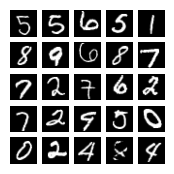

In [3]:
# Visualizamos 25 muestras del conjunto de entrenamiento
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(2,2))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.close('all')

In [4]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation
from keras.utils import to_categorical, plot_model

In [5]:
# Convertimos a un array OHE
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# Calculamos la dimensión del array que representa la imagen de entrada
# (asumimos que es cuadrada)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [7]:
# Cambiamos la forma de los arrays de entrada y normalizamos
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [8]:
# La red (modelo) consiste una capa de entrada, dos capas con activación ReLU  
# y la capa de salida que contiene solo los valores de activación
model = Sequential()
model.add(Input(shape=(input_size,)))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,710 (393.40 KB)

 Trainable params: 100,710 (393.40 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=25, batch_size=128, verbose=0)

In [12]:
loss, acc = model.evaluate(x_test, y_test, batch_size=128)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.9721 - loss: 0.1643

Test accuracy: 97.6%


In [13]:
# Matriz de confusión
# Nota: este código está tomado directamente de la web de scikit-learn 0.18
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Etiqueta predicha')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step


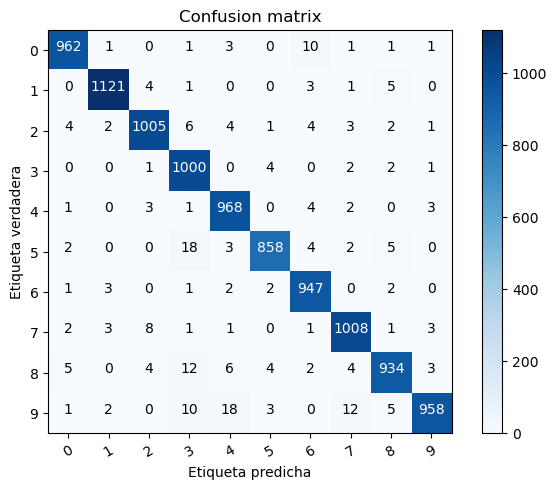

In [14]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))


### Copyright 2020-2024 Facundo Batista y Manuel Carlevaro

Licencia CC BY-NC-SA 4.0

Para más info visitar: https://github.com/facundobatista/libro-pyciencia/

